# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [ ]:
df = pd.read_csv("/datasets/users_behavior.csv")

In [ ]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


## Разбейте данные на выборки

In [ ]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.20, random_state=12345)

<font size=3 color=#000080>**Для контроля за корректностью разбиения использовала .shape**</font>

In [ ]:
print("Обучающая выборка:", features_train.shape, target_train.shape)
print("Тестовая выборка:", features_test.shape, target_test.shape)
print("Валидационная выборка:", features_valid.shape, target_valid.shape)

Обучающая выборка: (2056, 4) (2056,)
Тестовая выборка: (643, 4) (643,)
Валидационная выборка: (515, 4) (515,)


Разбиение корректное

## Исследуйте модели

<font size=4>**Модель "решающее дерево"**</font>

In [ ]:
model = DecisionTreeClassifier(random_state=12345,  max_depth=3)
model.fit(features_train, target_train)

test_prediction = model.predict(features_valid)
train_prediction = model.predict(features_train)

print("Несовпадений", sum(test_prediction!=target_valid.values))
print("Совпадений", sum(test_prediction==target_valid.values))

result_valid = accuracy_score(target_valid,test_prediction)
result_train = accuracy_score(target_train, train_prediction)

print("Accuracy модели на валидационной выборке:", result_valid)
print("Accuracy модели на тренировочной выборке:", result_train)

Несовпадений 126
Совпадений 389
Accuracy модели на валидационной выборке: 0.7553398058252427
Accuracy модели на тренировочной выборке: 0.811284046692607


**Модель "решающее дерево" на валидационной выборке показала Accuracy - 0.7106796116504854**

<font size=4>*Попробуем улучшить модель, изменив глубину дерева*</font>

In [ ]:
best_model = 0
best_result = 0
best_depth = 0
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    if result > best_result:
        best_result = result
        best_model = model
        best_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, "глубина дерева: ", best_depth)

Accuracy наилучшей модели на валидационной выборке: 0.7572815533980582 глубина дерева:  5


**Модель "решающее дерево" на валидационной выборке при глубине 5 показала Accuracy - 0.7572815533980582. Модель улучшилась.**

<font size=3>**Построим решающее дерево**</font>

In [ ]:
#from sklearn import tree
#import matplotlib.pyplot as plt

#plt.figure(figsize=(25,25))
#tree.plot_tree(model)

<font size=3 color=#000080>**В таком виде решающее дерево выглядит гораздо лучше**</font>

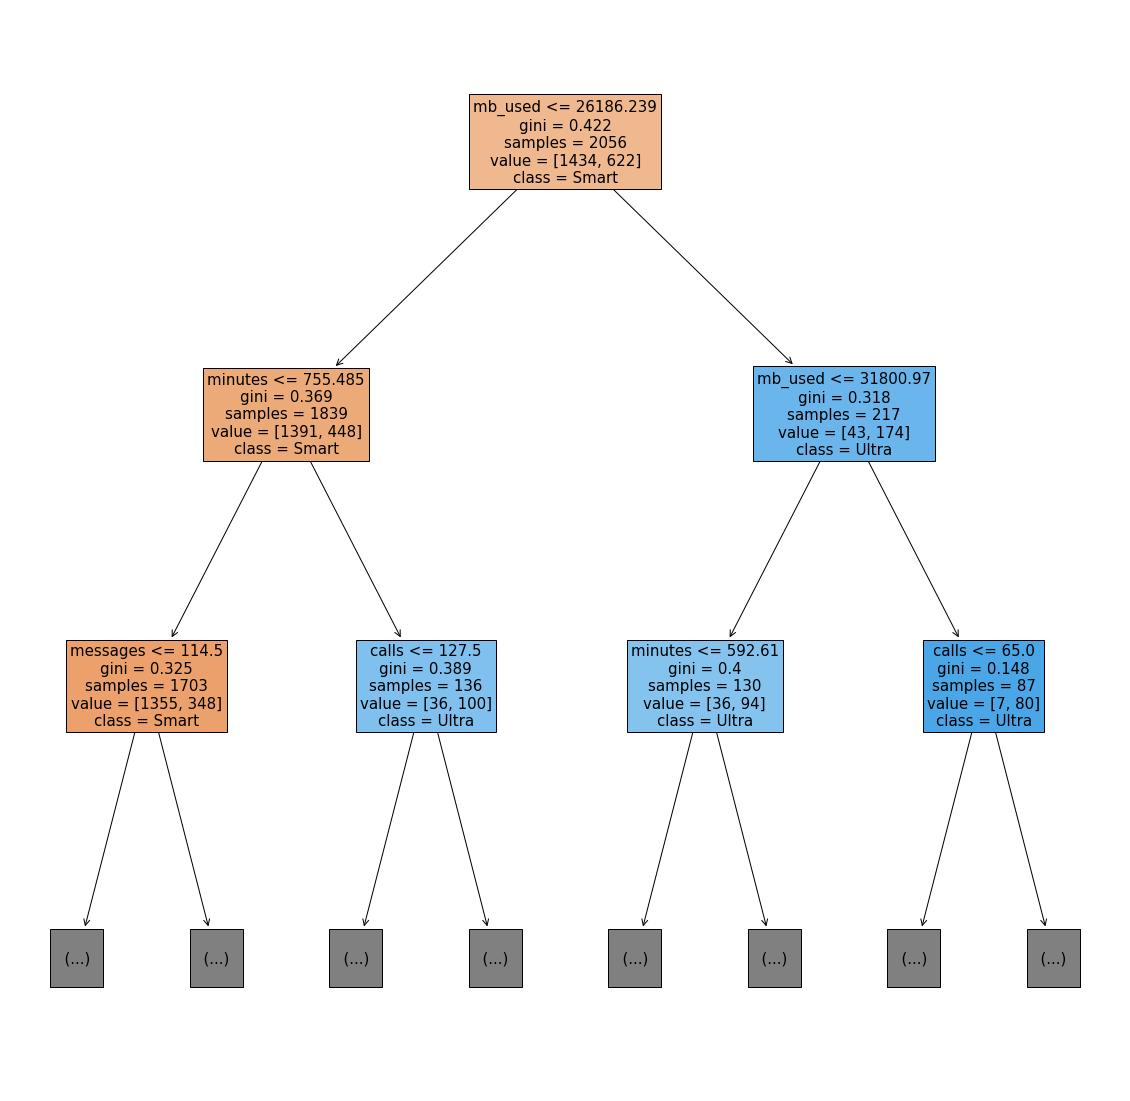

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20,20))
tree.plot_tree(model, feature_names=features.columns.values, class_names=['Smart','Ultra'],
               filled=True, fontsize = 15, max_depth = 2);

<font size=4>**Модель "случайный лес"**</font>

In [ ]:
%%time
best_model = 0
best_result = 0
best_est = 0
best_depth = 0
for est in range(1,11):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        print(f"Accuracy: {result}, деревьев: {est},глубина:{depth}")
        if result> best_result:
            best_model = model.fit(features_train, target_train)
            best_result = result
            best_est = est
            best_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, "деревьев", best_est, "глубина",best_depth)

Accuracy: 0.7165048543689321, деревьев: 1,глубина:1
Accuracy: 0.7495145631067961, деревьев: 1,глубина:2
Accuracy: 0.7533980582524272, деревьев: 1,глубина:3
Accuracy: 0.7533980582524272, деревьев: 1,глубина:4
Accuracy: 0.7475728155339806, деревьев: 1,глубина:5
Accuracy: 0.7572815533980582, деревьев: 1,глубина:6
Accuracy: 0.7669902912621359, деревьев: 1,глубина:7
Accuracy: 0.7631067961165049, деревьев: 1,глубина:8
Accuracy: 0.7631067961165049, деревьев: 1,глубина:9
Accuracy: 0.7514563106796116, деревьев: 1,глубина:10
Accuracy: 0.7165048543689321, деревьев: 2,глубина:1
Accuracy: 0.7514563106796116, деревьев: 2,глубина:2
Accuracy: 0.7611650485436893, деревьев: 2,глубина:3
Accuracy: 0.7572815533980582, деревьев: 2,глубина:4
Accuracy: 0.7592233009708738, деревьев: 2,глубина:5
Accuracy: 0.7728155339805826, деревьев: 2,глубина:6
Accuracy: 0.7747572815533981, деревьев: 2,глубина:7
Accuracy: 0.7631067961165049, деревьев: 2,глубина:8
Accuracy: 0.7514563106796116, деревьев: 2,глубина:9
Accuracy: 0

<font size=3 color=#000080>**Посчитаю время работы модели "случайный лес" на выбранных гиперпараметрах, которые дают лучший результат.**</font>

In [ ]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=6, max_depth=9)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)
print(f"Accuracy: {result}, деревьев: 6 ,глубина: 9")


Accuracy: 0.7922330097087379, деревьев: 6 ,глубина: 9
CPU times: user 23.7 ms, sys: 3.57 ms, total: 27.2 ms
Wall time: 26.4 ms


<font size=3 color=#000080>**Вполне хорошее время. Данную модель с параметрами  деревьев: 6, глубиной: 9 и значением Accuracy: 0.7922330097087379 будем считать лучшей.**</font>


<font size=4>Рассмотрели как изменяется модель "случайный лес" при изменении гиперпараметров. <br>Наибольшее значение accuracy  на валидационной выборке: 0.7922330097087379 при количестве деревьев -  6 и глубине - 9.</font>



<font size=4>**Модель "Логистическая регрессия"**</font>

In [ ]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)
print("Accuracy на валидационной выборке:",result)

Accuracy на валидационной выборке: 0.7165048543689321


<font size=4>Модель "Логистическая регрессия" показала Accuracy на валидационной выборке 0.7165048543689321. Что меньше чем на "Решающем дереве" и на модели "случйный лес".</font>

<font size=3 color=#000080>**Модель "Логистическая регрессия" показала Accuracy на валидационной выборке 0.7165048543689321<br><br>
Модель "Случайны лес"  показала Accuracy на валидационной выборке 0.7922330097087379<br><br>
Модель "Решающее дерево" показала Accuracy на валидационной выборке 0.7572815533980582<br><br>
Выбираем лучшую модель Случайный лес**</font>


- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?<br>
    - Предположу что это переобучение. Метрика на train должна остаться прежней.<br>

- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?<br>
     - ?
- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия". Нет ли тут парадокса? )<br>
    - ?
- Почему логистическая регрессия показывать на много более худшие результаты?<br>
    - ?


## Проверьте модель на тестовой выборке

<font size=3 color=#000080>**Проверим работу выбранной модели на тестовой выборке.**</font>

<font size=3>**"Случайный лес" на тестовой выборке**</font>

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=6, max_depth=9)
model.fit(features_train, target_train)
result = model.score(features_test, target_test)

print("Accuracy модели 'случайный лес' на тестовой выборке:",result)

Accuracy модели 'случайный лес' на тестовой выборке: 0.7947122861586314


<font size=4 color=#000080>Accuracy модели 'случайный лес'<br>
на тестовой выборке при 6 деревьях и глубине 9: 0.7916018662519441, <br>
на валидационной это значение - 0.7922330097087379.<br><br>
Значения практичсеки совпадают как на валидационном так и на тестовых наборах. Что говорит о том, что модель дает хорошие ответы.
<br>
**Случайный лес дает лучший результат.**</font>

## (бонус) Проверьте модели на адекватность

<font size=4>Проверим модель на адекватность. Использовать будем sklearn.dummy.DummyClassifier</font>

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=9, max_depth=4)
model.fit(features_train, target_train)
result = model.score(features_test, target_test)

print("Accuracy модели 'случайный лес' на тестовой выборке:",result)

Accuracy модели 'случайный лес' на тестовой выборке: 0.7916018662519441


In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_clf.fit(features_train, target_train)
clf_predict=dummy_clf.predict(features_valid)
clf_predict=dummy_clf.score(features_valid, target_valid)

print('Accuracy DummyClassifier:', clf_predict, clf_predict)

Accuracy DummyClassifier: 0.6757281553398058 0.6757281553398058


<font size=4>Accuracy модели DummyClassifier ниже, чем у модели RandomForestClassifier значит модель адекватна и эффективна.</font>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

<font size=4>**Общий вывод**<br>
1. Данные в датасете очищены и не требуют предобработки<br><br>
2. Данные были разбиты на три выборки: тренировочную, валидационную, тестовую в соотношении 3:1:1<br><br>
3. Для решения задачи классификации были построены три модели: «Решающее дерево», «Случайный лес», «Логистическая регрессия».<br><br>
4. Все модели были обучены на тренировочной выборке и проверены на валидационной выборке. Была выбрана лучшая модель - Случайный лес. Модель протестирована, оценено время работы модели.
   
    **Случайный лес**<br>
       - на тестовой выборке при 6 деревьях и глубине 9: 0.7916018662519441,
       - на валидационной это значение - 0.7922330097087379.

    Значения практически совпадают как на валидационном так и на тестовых наборах. Что говорит о том, что модель дает хорошие ответы.
    
6. Модель была рассмотрена при различных гиперпараметрах. В модели «случайный лес» рассматривались гиперпараметры – глубина и количество деревьев. <br>Это позволило увидеть как меняется показатель Accuracy в зависимости от величины данных параметров. Можно сделать вывод о том, что с увеличением глубины точность Accuracy увеличивается. Количество деревьев влияет на точность, но это влияние не прямо пропорционально. Влияние depth сильнее. При этом стоит помнить о том, что увеличение глубины и количества деревьев влияет на скорость работы модели.<br><br>

7.  Была оценена адекватность выбранной модели. Accuracy модели DummyClassifier ниже, чем у модели RandomForestClassifier значит модель адекватна и эффективна. <br></font>
